<a href="https://colab.research.google.com/github/greyhound101/internship/blob/master/densenet_all.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
drive.mount("/content/gdrive", force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
Mounted at /content/gdrive


Impoting all necessary packages

In [2]:
import zipfile
import h5py
from keras.optimizers import Adam
import cv2
from keras.utils import to_categorical
import glob, os
from matplotlib import pyplot as plt
import h5py
from sklearn.metrics import accuracy_score
import numpy as np
from tqdm import tqdm
import time
import gc
from keras.applications import *
from keras.layers import *
from keras import backend as K
from keras.models import Model

Using TensorFlow backend.


Loading the data

In [3]:
path = F"/content/gdrive/My Drive/check.npy" 
df=np.load(path,allow_pickle=True)
df=df.item()

Function to shuffle data in fold and load each fold

In [4]:

#shuffle samples
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]



#change targets
def change(img):
    resized = cv2.resize(img, (299,299), interpolation = cv2.INTER_AREA )
    return resized




#get train and test splits
def get_trn_tst(df,tst_fold):
  idx=np.asarray(df['fold'])
  y=np.asarray(df['label'])
  y-=1
  img=np.asarray(df['image'])
  img1=np.asarray(img)
  del([img])
  gc.collect()
  trn_y=np.asarray(y[(idx!=tst_fold)])
  trn_img=np.asarray(img1[(idx!=tst_fold)])
  tst_y=np.asarray(y[(idx==tst_fold)])
  tst_img=img1[idx==tst_fold]
  trn_img=np.repeat(trn_img.reshape((trn_img.shape[0],224,224,1)),3,axis=3)
  tst_img=np.repeat(tst_img.reshape((tst_img.shape[0],224,224,1)),3,axis=3)
  return (trn_img.copy(),trn_y.copy()),(tst_img.copy(),tst_y.copy())

Function to load model

In [5]:
def load_model(last=True):   
  K.clear_session()
  mod=densenet.DenseNet121(include_top=True, weights='imagenet')
  out_1=mod.layers[-2]
  out=Dense(3,activation='softmax')(out_1.output)
  model=Model(inputs=mod.input,outputs=out)
  if last:
    for i in range(len(model.layers)):
        model.layers[i].trainable = False
  model.layers[-1].trainable=True
  return model

In [6]:
import keras
mod=load_model()
mod.summary()

33193984/33188688 [==============================] - 0s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
___________________________

Loading dictionaries to save data

In [7]:
best_accuracy_last={}
final_accuracy_last={}
history_last={}
answers_last={}
predictions_last={}
predictions_last_best={}
times_last={}

Training all layers

  0%|          | 0/5 [00:00<?, ?it/s]

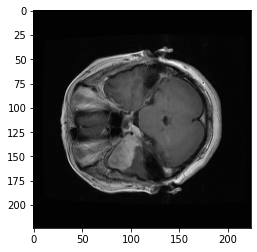

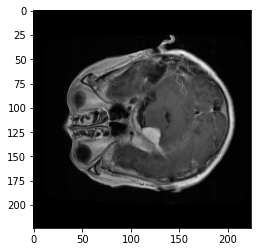

Train on 2522 samples, validate on 542 samples
Epoch 1/1
2522/2522 [==============================] - 94s 37ms/step - loss: 0.2672 - accuracy: 0.9040 - val_loss: 1.3602 - val_accuracy: 0.5886
Train on 2522 samples, validate on 542 samples
Epoch 1/1
2522/2522 [==============================] - 40s 16ms/step - loss: 0.0712 - accuracy: 0.9742 - val_loss: 0.2993 - val_accuracy: 0.8911
Train on 2522 samples, validate on 542 samples
Epoch 1/1
2522/2522 [==============================] - 40s 16ms/step - loss: 0.0439 - accuracy: 0.9877 - val_loss: 0.5132 - val_accuracy: 0.8635
Train on 2522 samples, validate on 542 samples
Epoch 1/1
2522/2522 [==============================] - 40s 16ms/step - loss: 0.0389 - accuracy: 0.9857 - val_loss: 0.1241 - val_accuracy: 0.9557
Train on 2522 samples, validate on 542 samples
Epoch 1/1
2522/2522 [==============================] - 40s 16ms/step - loss: 0.0292 - accuracy: 0.9893 - val_loss: 0.2418 - val_accuracy: 0.9410
Train on 2522 samples, validate on 542 s

 20%|██        | 1/5 [37:17<2:29:09, 2237.50s/it]

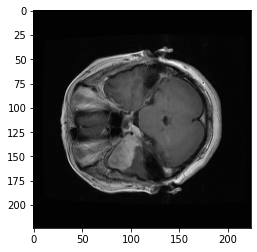

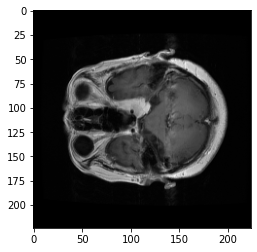

Train on 2385 samples, validate on 679 samples
Epoch 1/1
2385/2385 [==============================] - 86s 36ms/step - loss: 0.2258 - accuracy: 0.9157 - val_loss: 2.7882 - val_accuracy: 0.6244
Train on 2385 samples, validate on 679 samples
Epoch 1/1
2385/2385 [==============================] - 39s 16ms/step - loss: 0.0642 - accuracy: 0.9765 - val_loss: 1.4420 - val_accuracy: 0.6892
Train on 2385 samples, validate on 679 samples
Epoch 1/1
2385/2385 [==============================] - 39s 16ms/step - loss: 0.0474 - accuracy: 0.9836 - val_loss: 0.2315 - val_accuracy: 0.9028
Train on 2385 samples, validate on 679 samples
Epoch 1/1
2385/2385 [==============================] - 39s 16ms/step - loss: 0.0155 - accuracy: 0.9958 - val_loss: 0.2906 - val_accuracy: 0.9013
Train on 2385 samples, validate on 679 samples
Epoch 1/1
2385/2385 [==============================] - 39s 16ms/step - loss: 0.0099 - accuracy: 0.9962 - val_loss: 0.3473 - val_accuracy: 0.9087
Train on 2385 samples, validate on 679 s

 40%|████      | 2/5 [1:14:36<1:51:54, 2238.09s/it]

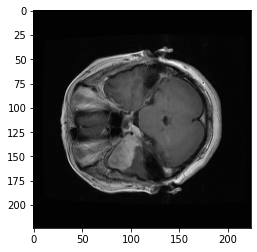

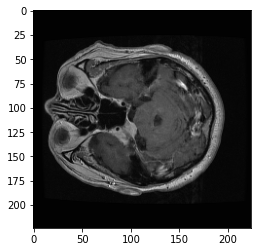

Train on 2492 samples, validate on 572 samples
Epoch 1/1
2492/2492 [==============================] - 93s 37ms/step - loss: 0.2406 - accuracy: 0.9057 - val_loss: 0.5917 - val_accuracy: 0.8619
Train on 2492 samples, validate on 572 samples
Epoch 1/1
2492/2492 [==============================] - 41s 16ms/step - loss: 0.0569 - accuracy: 0.9795 - val_loss: 0.4353 - val_accuracy: 0.8566
Train on 2492 samples, validate on 572 samples
Epoch 1/1
2492/2492 [==============================] - 41s 16ms/step - loss: 0.0259 - accuracy: 0.9924 - val_loss: 0.7424 - val_accuracy: 0.7098
Train on 2492 samples, validate on 572 samples
Epoch 1/1
2492/2492 [==============================] - 41s 16ms/step - loss: 0.0233 - accuracy: 0.9920 - val_loss: 0.2726 - val_accuracy: 0.8916
Train on 2492 samples, validate on 572 samples
Epoch 1/1
2492/2492 [==============================] - 40s 16ms/step - loss: 0.0357 - accuracy: 0.9880 - val_loss: 1.7649 - val_accuracy: 0.6416
Train on 2492 samples, validate on 572 s

 60%|██████    | 3/5 [1:52:35<1:15:00, 2250.09s/it]

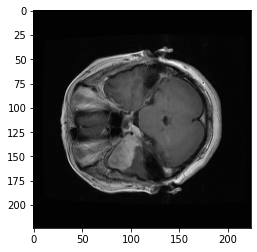

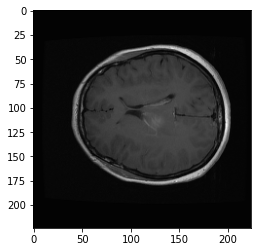

Train on 2436 samples, validate on 628 samples
Epoch 1/1
2436/2436 [==============================] - 93s 38ms/step - loss: 0.2536 - accuracy: 0.8986 - val_loss: 0.5744 - val_accuracy: 0.8025
Train on 2436 samples, validate on 628 samples
Epoch 1/1
2436/2436 [==============================] - 40s 16ms/step - loss: 0.0687 - accuracy: 0.9758 - val_loss: 1.3133 - val_accuracy: 0.6863
Train on 2436 samples, validate on 628 samples
Epoch 1/1
2436/2436 [==============================] - 40s 16ms/step - loss: 0.0397 - accuracy: 0.9877 - val_loss: 0.4150 - val_accuracy: 0.8790
Train on 2436 samples, validate on 628 samples
Epoch 1/1
2436/2436 [==============================] - 40s 16ms/step - loss: 0.0475 - accuracy: 0.9860 - val_loss: 0.2767 - val_accuracy: 0.8981
Train on 2436 samples, validate on 628 samples
Epoch 1/1
2436/2436 [==============================] - 40s 16ms/step - loss: 0.0335 - accuracy: 0.9893 - val_loss: 0.7160 - val_accuracy: 0.8360
Train on 2436 samples, validate on 628 s

 80%|████████  | 4/5 [2:30:16<37:33, 2253.43s/it]  

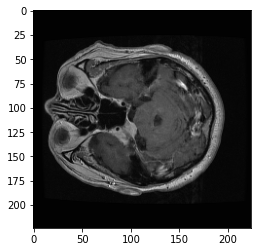

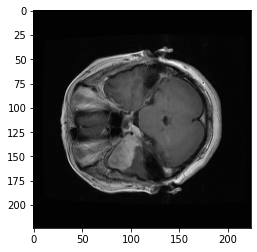

Train on 2421 samples, validate on 643 samples
Epoch 1/1
2421/2421 [==============================] - 93s 38ms/step - loss: 0.2487 - accuracy: 0.9071 - val_loss: 2.1268 - val_accuracy: 0.5816
Train on 2421 samples, validate on 643 samples
Epoch 1/1
2421/2421 [==============================] - 40s 17ms/step - loss: 0.0574 - accuracy: 0.9802 - val_loss: 0.7021 - val_accuracy: 0.7636
Train on 2421 samples, validate on 643 samples
Epoch 1/1
2421/2421 [==============================] - 40s 16ms/step - loss: 0.0335 - accuracy: 0.9888 - val_loss: 1.0292 - val_accuracy: 0.6765
Train on 2421 samples, validate on 643 samples
Epoch 1/1
2421/2421 [==============================] - 40s 16ms/step - loss: 0.0178 - accuracy: 0.9922 - val_loss: 0.2990 - val_accuracy: 0.8974
Train on 2421 samples, validate on 643 samples
Epoch 1/1
2421/2421 [==============================] - 40s 16ms/step - loss: 0.0280 - accuracy: 0.9901 - val_loss: 0.6757 - val_accuracy: 0.8351
Train on 2421 samples, validate on 643 s

100%|██████████| 5/5 [3:07:33<00:00, 2250.69s/it]


In [8]:
def upd(dk,data):
    if dk==0:
        dk=data
    else:
        for ky in data.keys():
            dk[ky].extend(data[ky])
    return dk
for index in tqdm(range(1,6)):
  epoch=50
  pre_acc=0
  best=0
  fold='fold_'+str(index)
  trn,tst=get_trn_tst(df,index)
  history_last[fold]=0
  
  plt.imshow(trn[0][0])
  plt.show()
  plt.imshow(tst[0][0])
  plt.show()



  trn_x,trn_y=unison_shuffled_copies(trn[0],trn[1])
  tst_x,tst_y=unison_shuffled_copies(tst[0],tst[1])
  


  model=load_model(last=False)


  
  #compiling the model
  model.compile(optimizer=Adam(3e-4), 
                     loss='categorical_crossentropy', 
                     metrics=['accuracy'])
  
  
  #fitting the model
  #timing
  start=time.time()
  for i in range(epoch):
      hist=model.fit(trn_x,to_categorical(trn_y),batch_size=32,epochs=1,validation_data=[tst_x,to_categorical(tst_y)])
      pre=model.predict(tst_x)
      pre=np.argmax(pre,1)
      new_acc=accuracy_score(pre,tst_y)
      if new_acc>best:
            best_accuracy_last[fold]=new_acc
            best=new_acc
      
      #storing the result
      history_last[fold]=upd(history_last[fold],hist.history)
  end=time.time()
  times_last[fold]=end-start


  #getting the prediction 
  pre=model.predict(tst_x)
  



  #select the maximum position
  pre=np.argmax(pre,1)

  
  
  
  #getting the accuracy
  new_acc=accuracy_score(pre,tst_y)

  


  #storing the predictions
  final_accuracy_last[fold]=new_acc

  










  #storing the answers
  answers_last[fold]=tst_y
    
    
    
    
  #freeing memory
  del([trn,tst,trn_x,trn_y,tst_x,tst_y,model])
  gc.collect()

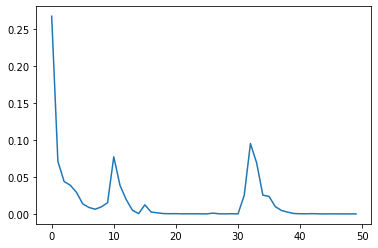

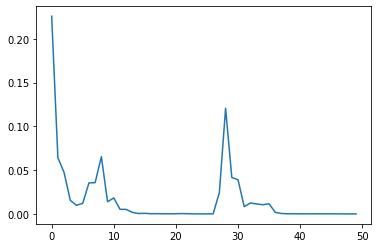

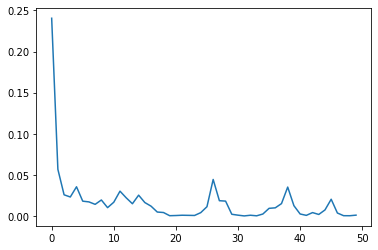

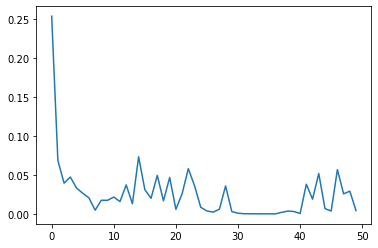

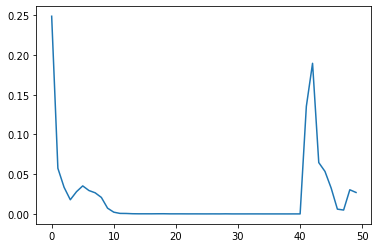

In [13]:
for i in range(1,6):
  plt.plot(history_last['fold_'+str(i)]['loss'])
  plt.show()

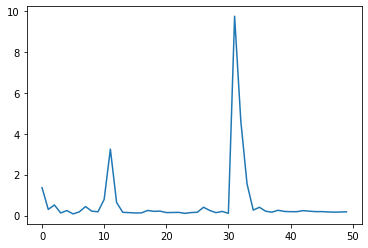

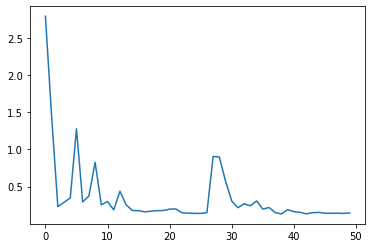

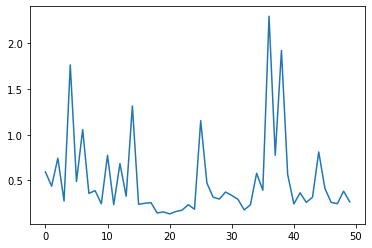

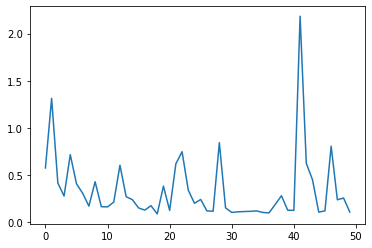

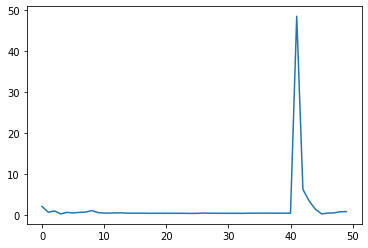

In [14]:
for i in range(1,6):
  plt.plot(history_last['fold_'+str(i)]['val_loss'])
  plt.show()

In [10]:
type='all'
model='densenet'
path = F"/content/gdrive/My Drive/"+model 
np.save(path+"/best_accuracy_all_fold_"+"_"+model+"_"+type+".npy",best_accuracy_last)
np.save(path+'/final_accuracy_all_fold'+"_"+model+"_"+type+".npy",final_accuracy_last)
np.save(path+'/history_all_fold_'+"_"+model+"_"+type+".npy",history_last)
np.save(path+'/answers_all_fold_'+"_"+model+"_"+type+".npy",answers_last)
np.save(path+'/predictions_all_fold_'+"_"+model+"_"+type+".npy",predictions_last)
np.save(path+'/predictions_all_best_fold_'+"_"+model+"_"+type+".npy",predictions_last_best)
np.save(path+'/times_all_fold_'+"_"+model+"_"+type+".npy",times_last)

In [11]:
new_acc

0.8818040435458787